In [12]:
import wordcloud
import matplotlib.pyplot as plt

In [4]:
word_count = {'feel': 11,
 'empty': 3,
 'telling': 1,
 'someone': 5,
 'can’t': 8,
 'life': 67,
 'anymore': 5,
 'fuck': 5,
 'everything': 3,
 'try': 1,
 'make': 4,
 'things': 2,
 'better': 2,
 'normal': 3}


In [16]:
wordcloud.WordCloud?

In [17]:
wc_class = wordcloud.WordCloud(background_color='white')

wc = wc_class.generate_from_frequencies(word_count)

In [33]:
img = wc.to_image()

In [39]:
img.save??

In [42]:
from io import BytesIO
import base64

output = BytesIO()
img.save(output, format='PNG')
output.seek(0)
output_s = output.read()
b64 = base64.b64encode(output_s)
# return 
b64

b'iVBORw0KGgoAAAANSUhEUgAAAZAAAADICAIAAABJdyC1AABjuElEQVR4nO2dd3xT1RfAz8veTduki+5FS0tbKKtQoOwpe6s4UVyoqMjPreBegANBQWWLCMoeZUOhe++9Z5Jm7+T3xytpaNM2SZMOeN+PHz+v991370npO7n33DMQvV4PGBgYGIMBXH8LgIGBgWEumMLCwMAYNBD6WwB7MT1+q1AtA4AlXmP+F77Iorsom9IOcimst4Y9Yl9BMTAwzGagKyyhWtasEAUy3Sx98NL0d8VqxRMJP1lxF0UPQMThLZ0XAwPDfgx0hXWuNqNc0tTVIqgbEEBYRCoeMb3n7f4uytcjH7V0UoyBj1itZBLJ/S2Flby9/6xeD1+tndvfgvQbA92GdbeluL9FwBig/Fuea+kjZSL+wrN/2kOYPkCl0V7JLm0RSftbkP5k4K6w3ko7mM4vRy1Nx6uT0Ma7s7calkXF4oYdBecyBBUEBB/rEvJG6Dw2iW6TqRdf/6ZGxgeAGe4Rn0WtMr71fOKvYzmBOED+rkoUqWUBDNfXQudGOfoaOtxuLvyl6FKZpEml06Ato5z9d4551iaCYRiz8fZprU63NGC4mf2v1pZuuHlSrFbaVSr7kV5Wq1Rr+luKfmbgKqw3h83X6XUvJ/8+zGHIi8Ez0UaDtqqV8dfd3TXSye+76LUyjfKHwvOb0g7uHvecTaY+PvkNsVrxcvJek3cPld/2ojtvDltIwRN3Fce/mXrgv7i36AQyAFRJW95KO7AucNqP3mMKhHUbU/etC5z6ZECcTaTC6IBOr3/rzlkd6JcHRPTYeWfO3a8zrusGs9fhzfyK/hah/xm4CsuV4gAABARPw5PdqY4d7v5Rdp1GIH8xYg0JRwAANon+7N1dSbySMc6BvZ8atXChI3dGoVN/H70WXc05EGmP3v4hT1gz2jkAABKai4g4wpMBkxFAxnICx3OD0wUVT/ZeIAxT4BFEq9dvSjir0elWB0

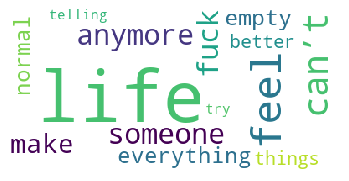

In [31]:
plt.imshow(wc.to_image())
plt.axis("off")
plt.show()

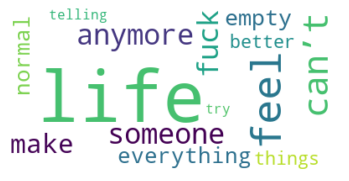

In [19]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
"don't" in wordcloud.STOPWORDS

True

In [1]:
import pymongo

In [2]:
client = pymongo.MongoClient()

In [3]:
db = client.happy

In [5]:
docs = db.word_count.find().sort("count", -1).limit(20)
for doc in docs:
    print(doc)

{'_id': 'life', 'count': 19}
{'_id': 'you’re', 'count': 10}
{'_id': 'even', 'count': 8}
{'_id': 'get', 'count': 8}
{'_id': 'don’t', 'count': 6}
{'_id': '5', 'count': 6}
{'_id': 'reasons', 'count': 6}
{'_id': 'insurance', 'count': 6}
{'_id': 'think', 'count': 6}
{'_id': 'young', 'count': 6}
{'_id': 'need', 'count': 6}
{'_id': 'someone', 'count': 3}
{'_id': 'can’t', 'count': 2}
{'_id': 'anymore', 'count': 2}
{'_id': 'fuck', 'count': 2}
{'_id': 'everything', 'count': 2}
{'_id': 'make', 'count': 2}
{'_id': 'normal', 'count': 2}
{'_id': 'know', 'count': 2}
{'_id': 'going', 'count': 2}


In [ ]:
coll = db.tweets

In [ ]:
cursor = coll.find({'_id': {"$in": ["1218914127810301953"]} })
for doc in cursor:
    print(doc)

In [ ]:
delete_result = coll.delete_many({'_id': {"$in": ["1218914127810301953"]} })
delete_result.deleted_count

In [ ]:
coll.delete_many??

In [ ]:
res = coll.aggregate([
    {'$sort' : {"prob": -1}},
    {'$limit' : 20}])

In [ ]:
for doc in res:
    print(doc)

In [ ]:
docs = db.tweets.find().sort("prob", -1).limit(20)

In [ ]:
for doc in docs:
    print(doc)

In [ ]:
tweet = {"id": "1218878079206154240", 
         "text": "all i do is sleeping and listening to lana fucking del rey I need to get a life.",
         "preprocessed_text": "sleep listen lana fuck del rey need get life",
         "class": 1, "prob": 0.7438481075201294}

In [ ]:
db.tweets.insert_one(tweet)

In [ ]:
import sys
import os
sys.path.insert(0, os.path.abspath("../models/"))

In [ ]:
import pickle
with open(os.path.abspath("../models/final_model.pkl"), "rb") as f:
    final_model = pickle.load(f)

In [ ]:
from models import load_model

In [ ]:
final_model = load_model()

In [ ]:
final_model.predict("I am not satisfied my life")

In [ ]:
import six

In [ ]:
class Consumer(six.Iterator):
    def __init__(self,):
        self.start = 0
        self.end = 5
        
    def __iter__(self):
        return self
        
    def __next__(self):
        self.start = self.start + 1
        if self.start >= self.end:
            raise StopIteration("done")
        return self.start
    
c = Consumer()

In [ ]:
c.

In [ ]:
for msg in c:
    print(msg)

In [ ]:
import json

In [ ]:
def serializer(k_or_v):
    return json.dumps(k_or_v).encode('utf-8')

In [ ]:
serializer({"text":"hey"})

In [ ]:
type("abc")

In [ ]:
s = 'abc'
type(s)

In [ ]:
isinstance(s, str)

In [ ]:
import emoji